In [71]:
import autograd
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt

import torch

# Data

In [72]:
_data = np.pi * (np.random.rand(10000, 1) * 2 - 1)
_label = np.cos(_data) + 2 

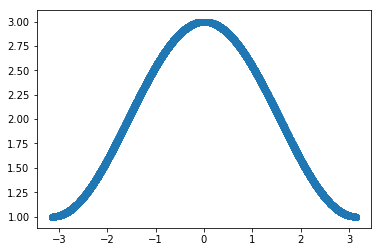

In [73]:
plt.scatter(_data, _label)

# Pytorch

In [4]:
m = torch.nn.Linear(1, 32)
print(list(m.parameters())[1])

Parameter containing:
tensor([-0.6601,  0.7855,  0.8815,  0.4951, -0.3316, -0.4159, -0.7662, -0.1359,
         0.6986, -0.3518,  0.8794,  0.7751, -0.8245,  0.1699, -0.2930, -0.7770,
        -0.5835, -0.6979,  0.3193, -0.6000, -0.4720,  0.7614,  0.0831, -0.0213,
        -0.0181, -0.8735,  0.2097, -0.8209,  0.1558, -0.3593,  0.8689, -0.4430],
       requires_grad=True)


0 64.39247131347656
100 1.6521646976470947
200 0.4239879846572876
300 0.5658515095710754
400 0.39488378167152405


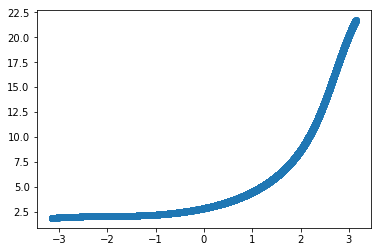

In [5]:
mm = torch.nn.Sequential(torch.nn.Linear(1, 32), 
                         torch.nn.Tanh(), 
                         torch.nn.Linear(32, 32),
                         torch.nn.Tanh(),
                         torch.nn.Linear(32, 1))

def train(mm):
    
    data = torch.tensor(_data, dtype=torch.float32)
    label = torch.tensor(_label, dtype=torch.float32)
    
    for i in range(500):
        
        out = mm(data)
        loss = ((out-label)**2).mean()
        
        mm.zero_grad()
        loss.backward()
        for p in mm.parameters():
            p.data.sub_(0.01 * p.grad.data)

        if i % 100 == 0:
            print(i, loss.item())

train(mm)


plt.scatter(_data, mm(torch.tensor(_data, dtype=torch.float32)).data.numpy())

# Tensor

In [6]:
class Model(autograd.Module):
    def __init__(self, ):
        super().__init__()
        self.l1 = autograd.Linear(1, 32)
        self.l2 = autograd.Linear(32, 32)
        self.l3 = autograd.Linear(32, 1)
    
        self.w1 = autograd.Parameter(1, 32)
        self.b1 = autograd.Parameter(32)
        self.w2 = autograd.Parameter(32, 32)
        self.b2 = autograd.Parameter(32)
        self.w3 = autograd.Parameter(32, 1)
        self.b3 = autograd.Parameter(1)
        
    def forward(self, data):
        out = autograd.tanh(self.l1(data))
        out = autograd.tanh(self.l2(out))
        out = self.l3(out)
        # out = autograd.relu(data @ self.w1 + self.b1)
        # out = autograd.relu(out @ self.w2 + self.b2)
        # out = out @ self.w3 + self.b3
        
        return out

In [7]:
model = Model()
for n, p in model.named_parameters():
    print(n, p.shape, id(p), p.sum())
    break

Model.b1 (32,) 139660258123392 Tensor(0.47001769928049586, requires_grad=True)


0 67.6645732768983
100 1.1073874655772682
200 0.4555357230740925
300 0.6723689165697094
400 0.4895021742257024


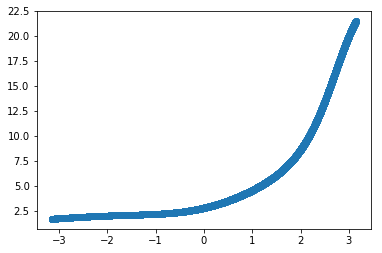

In [8]:
model = Model()

def train(model):
    
    data = autograd.Tensor(_data)
    label = autograd.Tensor(_label)

    lr = 0.01
    
    for i in range(500):
        
        model.zero_grad()
        
        out = model(data)
        loss = ((out - label) ** 2).mean()
        loss.backward()
        
        for p in model.parameters():
            p.sub_(p.grad * lr)
            
        if i % 100 == 0:
            print(i, loss.data)

train(model)

plt.scatter(_data, model(autograd.Tensor(_data)).data)

# Variable

0 4.675942785405197
100 0.06346355200366345
200 0.007211631264069839
300 0.0019630230084454786
400 0.0014356041573590807


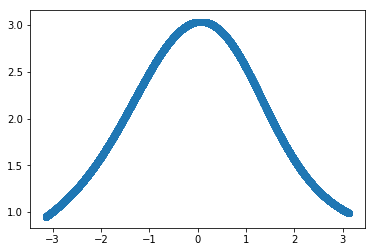

In [74]:
from autograd import variable

class Model(variable.Module):
    def __init__(self, ):
        super().__init__()
        self.l1 = variable.Linear(1, 32)
        self.l2 = variable.Linear(32, 32)
        self.l3 = variable.Linear(32, 1)
        
    def forward(self, data):
        out = variable.Tanh()(self.l1(data))
        out = variable.Tanh()(self.l2(out))
        out = self.l3(out)
        
        return out


def train(model):
    
    data = variable.Variable(_data)
    label = variable.Variable(_label)

    lr = 0.01
    
    for i in range(500):
        
        model.zero_grad()
        
        out = model(data)
        loss = ((out - label) ** 2).mean()
        loss.backward()
        
        for p in model.parameters():
            p.data -= p.grad * lr
            
        if i % 100 == 0:
            print(i, loss.data)

            
model = Model()
train(model)

plt.scatter(_data, model(variable.Variable(_data)).data)

# Linear

In [9]:
import torch
print(torch.__version__)

1.5.0+cpu


In [16]:
a = np.random.rand(3, 10)
b = np.random.rand(10, 4)
c = np.random.rand(4)

In [18]:
x = torch.tensor(a, requires_grad=True)
m = torch.tensor(b, requires_grad=True)
k = torch.tensor(c, requires_grad=True)
y = x @ m + k
y = y.mean()
y.backward()

print(x.grad)
print(m.grad)
print(k.grad)

tensor([[0.2120, 0.1006, 0.2438, 0.0930, 0.2412, 0.1319, 0.1833, 0.1887, 0.2144,
         0.1574],
        [0.2120, 0.1006, 0.2438, 0.0930, 0.2412, 0.1319, 0.1833, 0.1887, 0.2144,
         0.1574],
        [0.2120, 0.1006, 0.2438, 0.0930, 0.2412, 0.1319, 0.1833, 0.1887, 0.2144,
         0.1574]], dtype=torch.float64)
tensor([[0.1149, 0.1149, 0.1149, 0.1149],
        [0.1313, 0.1313, 0.1313, 0.1313],
        [0.1865, 0.1865, 0.1865, 0.1865],
        [0.1239, 0.1239, 0.1239, 0.1239],
        [0.1452, 0.1452, 0.1452, 0.1452],
        [0.0889, 0.0889, 0.0889, 0.0889],
        [0.0995, 0.0995, 0.0995, 0.0995],
        [0.2377, 0.2377, 0.2377, 0.2377],
        [0.1046, 0.1046, 0.1046, 0.1046],
        [0.1467, 0.1467, 0.1467, 0.1467]], dtype=torch.float64)
tensor([0.2500, 0.2500, 0.2500, 0.2500], dtype=torch.float64)


In [19]:
x = autograd.Tensor(a, requires_grad=True)
m = autograd.Tensor(b, requires_grad=True)
k = autograd.Tensor(c, requires_grad=True)
y = x @ m + k
y = y.mean()
y.backward()

print(x.grad)
print(m.grad)
print(k.grad)

Tensor([[0.21200565 0.10064502 0.24384576 0.09304668 0.24124357 0.13193396
  0.1833288  0.18867418 0.21441004 0.15744546]
 [0.21200565 0.10064502 0.24384576 0.09304668 0.24124357 0.13193396
  0.1833288  0.18867418 0.21441004 0.15744546]
 [0.21200565 0.10064502 0.24384576 0.09304668 0.24124357 0.13193396
  0.1833288  0.18867418 0.21441004 0.15744546]], requires_grad=False)
Tensor([[0.11487319 0.11487319 0.11487319 0.11487319]
 [0.13132735 0.13132735 0.13132735 0.13132735]
 [0.18647966 0.18647966 0.18647966 0.18647966]
 [0.12394914 0.12394914 0.12394914 0.12394914]
 [0.14519449 0.14519449 0.14519449 0.14519449]
 [0.08886295 0.08886295 0.08886295 0.08886295]
 [0.09947583 0.09947583 0.09947583 0.09947583]
 [0.23766717 0.23766717 0.23766717 0.23766717]
 [0.10458872 0.10458872 0.10458872 0.10458872]
 [0.14666803 0.14666803 0.14666803 0.14666803]], requires_grad=False)
Tensor([0.25 0.25 0.25 0.25], requires_grad=False)


In [13]:
x = torch.tensor(a, requires_grad=True)

y = torch.tanh(x)
y.mean().backward()

print(x.grad)

tensor([[0.0293, 0.0284, 0.0295, 0.0292, 0.0182, 0.0145, 0.0180, 0.0316, 0.0217,
         0.0227],
        [0.0155, 0.0321, 0.0180, 0.0223, 0.0273, 0.0215, 0.0247, 0.0147, 0.0228,
         0.0146],
        [0.0188, 0.0250, 0.0252, 0.0194, 0.0182, 0.0277, 0.0227, 0.0323, 0.0332,
         0.0309]], dtype=torch.float64)


In [14]:
x = autograd.Tensor(a, requires_grad=True)

y = autograd.tanh(x)
y.mean().backward()

print(x.grad)

Tensor([[0.02932208 0.02837617 0.02954617 0.02915454 0.01818414 0.01449179
  0.01803519 0.03163825 0.02167592 0.02269661]
 [0.01551822 0.03210233 0.01795252 0.02228669 0.0273407  0.02149842
  0.02474053 0.01469801 0.02284488 0.01463336]
 [0.01881288 0.02495799 0.02519299 0.01938398 0.01822057 0.02769743
  0.0227085  0.03229486 0.03319141 0.03086085]], requires_grad=False)


# Conv

In [66]:
data = np.random.rand(10, 3, 5, 5).astype(np.float32)
# print(data)

In [67]:
tensor = torch.tensor(data, requires_grad=True)
conv = torch.nn.Conv2d(3, 10, kernel_size=3, stride=2, padding=1, padding_mode='zeros')

out = conv(tensor)
print(out.shape)
print(out.mean())

out.mean().backward()
# print(out)

print(conv.weight.grad.sum())
print(conv.bias.grad.sum())

torch.Size([10, 10, 3, 3])
tensor(0.0452, grad_fn=<MeanBackward0>)
tensor(8.1458)
tensor(1.0000)


In [68]:
from autograd import variable

conv2 = variable.Conv2d(3, 10, kernel_size=3, stride=2, padding=1)
conv2.weight.data = conv.weight.data.numpy()
conv2.bias.data = conv.bias.data.numpy()

var = variable.Variable( data, requires_grad=True ) 
out2 = conv2(var)

print(out2.shape)
print(out2.mean().data)

out2.mean().backward()
# print(out2.data)

print(conv2.weight.grad.sum())
print(conv2.bias.grad.sum())

(10, 10, 3, 3)
0.045224942452773885
8.145843023903176
0.9999999999999978


In [65]:
np.testing.assert_almost_equal(conv.weight.grad.data.numpy(), conv2.weight.grad, decimal=2)
np.testing.assert_almost_equal(conv.bias.grad.data.numpy(), conv2.bias.grad, decimal=2)

In [69]:
np.testing.assert_almost_equal(tensor.grad.data.numpy(), var.grad, decimal=2)

# Pool

## MaxPool

In [51]:
data = np.random.rand(10, 3, 5, 5).astype(np.float32)
# print(data)

In [52]:
maxpool = torch.nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
tensor = torch.tensor(data, requires_grad=True)
out = maxpool(tensor)
print('maxpool, ', out.sum())

out.mean().backward()
print(tensor.grad.sum())

maxpool,  tensor(224.7276, grad_fn=<SumBackward0>)
tensor(1.)


In [53]:
from autograd import variable

var = variable.Variable(data, requires_grad=True)
pool2 = variable.Pool2d(kernel_size=3, stride=2, padding=1)
out = pool2(var)

print(out.sum().data)

out.mean().backward()
print(var.grad.sum())

224.72755163908005
0.99999994


In [54]:
np.testing.assert_almost_equal(tensor.grad.data.numpy(), var.grad, decimal=2)

## AvgPool

In [58]:
tensor = torch.tensor(data, requires_grad=True)

avgpool = torch.nn.AvgPool2d(kernel_size=3, stride=2, padding=1)
out = avgpool(tensor)
print('avgpool, ', out.sum())

out.mean().backward()
print(tensor.grad.sum())

avgpool,  tensor(82.5031, grad_fn=<SumBackward0>)
tensor(0.6049)


In [59]:
from autograd import variable

var = variable.Variable(data, requires_grad=True)
pool2 = variable.Pool2d(kernel_size=3, stride=2, padding=1, mode='avg')

out = pool2(var)

print(out.sum().data)

out.mean().backward()
print(var.grad.sum())

82.50308165425668
0.60493827


In [60]:
np.testing.assert_almost_equal(tensor.grad.data.numpy(), var.grad, decimal=2)